### **FORECASTING**

**Read File**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import pandas as pd

# Mendapatkan path direktori home
home_dir = os.path.expanduser('~')

# Membuat path lengkap ke file CSV
file_path = os.path.join(home_dir, 'TA CNN-LSTM', 'data_imputed_combined_zero.csv')

# Baca file CSV
spku = pd.read_csv(file_path)

In [3]:
spku.head(n=20)

,tanggal,stasiun,pm10,so2,co,o3,no2
0,01/01/2013,DKI1 (Bunderan HI),75.000000,4.000000,23.000000,51.000000,9.000000
1,01/01/2013,DKI2 (Kelapa Gading),45.000000,3.000000,27.000000,135.000000,10.000000
2,01/01/2013,DKI3 (Jagakarsa),32.000000,3.883181,20.000000,30.000000,4.000000
3,01/01/2013,DKI4 (Lubang Buaya),57.000000,3.844928,26.000000,73.000000,7.000000
4,01/01/2013,DKI5 (Kebon Jeruk),57.513688,1.000000,13.000000,38.000000,7.000000
5,02/01/2013,DKI1 (Bunderan HI),35.000000,4.000000,21.000000,34.000000,8.000000
6,02/01/2013,DKI2 (Kelapa Gading),25.000000,3.000000,17.000000,192.000000,7.000000
7,02/01/2013,DKI3 (Jagakarsa),19.000000,3.710836,17.000000,59.000000,5.000000
8,02/01/2013,DKI4 (Lubang Buaya),35.000000,3.679800,26.000000,64.000000,6.000000
9,02/01/2013,DKI5 (Kebon Jeruk),47.605484,2.000000,12.000000,30.000000,5.000000


In [4]:
#Choose for PM10 Data only

pm10 = pd.DataFrame({'tanggal': spku['tanggal'], 'stasiun': spku['stasiun'], 'pm10': spku['pm10']})

print(pm10.head())

      tanggal               stasiun       pm10
0  01/01/2013    DKI1 (Bunderan HI)  75.000000
1  01/01/2013  DKI2 (Kelapa Gading)  45.000000
2  01/01/2013      DKI3 (Jagakarsa)  32.000000
3  01/01/2013   DKI4 (Lubang Buaya)  57.000000
4  01/01/2013    DKI5 (Kebon Jeruk)  57.513688


In [5]:
# Create sequences for 5 stations. Each sequence is for 1 step, which contains data from 5 stations.
# the  sequences are for the air pollution data and the dates data. 
# The dates sequences were also made so it would be easier to track the dates for each observation

seq_pm10 = []
dates_pm10 = []
for i in range(0, len(pm10), 5):
    seq = pm10.iloc[i:i+5]['pm10'].values
    dates = pm10.iloc[i:i+5]['tanggal'].values
    if len(seq) == 5:
        seq_pm10.append(seq)
        dates_pm10.append(dates)

# Convert to numpy arrays
seq_array_pm10 = np.array(seq_pm10)
dates_array_pm10 = np.array(dates_pm10)
for i in range(15):
    print(f"Sequence {i+1}: {seq_array_pm10[i]}")

Sequence 1: [75.         45.         32.         57.         57.51368785]
Sequence 2: [35.         25.         19.         35.         47.60548366]
Sequence 3: [46.50048325 36.         48.         58.         61.        ]
Sequence 4: [40.56445338 31.         14.         39.         28.        ]
Sequence 5: [34.38590052 23.         18.         53.         26.        ]
Sequence 6: [30.70149243 29.         19.         32.         26.        ]
Sequence 7: [27.60374228 28.         18.         28.         23.        ]
Sequence 8: [25.31389619 24.9395986  11.         33.         33.        ]
Sequence 9: [23.73477107 17.         12.         21.         12.        ]
Sequence 10: [22.92126444 24.         11.         23.         16.        ]
Sequence 11: [24.45304762 24.98371173 15.         39.         22.        ]
Sequence 12: [27.31950696 35.         19.         38.         35.        ]
Sequence 13: [29.74538202 26.         18.         37.         37.        ]
Sequence 14: [32.15055392 31.     

In [69]:
#make sequences for timestep. In this case, we are using timesteps = 12

# Define Time Steps, which is the number of steps we are going to look back in prediction
timesteps = 12  # T

# Define future steps, which is the number of steps we want to predict
future_steps = 90  # N

# Prepare time series data
time_data_pm10 = []
labels_pm10 = []
time_labels_pm10 = []

for i in range(len(seq_array_pm10) - timesteps - future_steps + 1):
    timestep = seq_array_pm10[i:i + timesteps]
    label = seq_array_pm10[i + timesteps:i + timesteps + future_steps]
    dates = dates_array_pm10[i + timesteps:i + timesteps + future_steps][:, 0]  # Take the first date in each sequence
    time_data_pm10.append(timestep)
    labels_pm10.append(label)
    time_labels_pm10.append(dates)

# Convert to numpy arrays
time_array_pm10 = np.array(time_data_pm10)
labels_pm10 = np.array(labels_pm10)
time_labels_pm10 = np.array(time_labels_pm10).flatten()

In [8]:
# Change the data dimension
dates_data_pm10 = []
for i in range(len(seq_array_pm10) - timesteps - future_steps + 1):
    dates = dates_array_pm10[i + timesteps:i + timesteps + future_steps]
    dates_data_pm10.append(dates)

# Convert to numpy array
dates_array_pm10_new = np.array(dates_data_pm10)

print(dates_array_pm10_new.shape)


(3186, 90, 5)


In [70]:
#show the array result
dates_array_pm10_new

array([[['13/01/2013', '13/01/2013', '13/01/2013', '13/01/2013',
         '13/01/2013'],
        ['14/01/2013', '14/01/2013', '14/01/2013', '14/01/2013',
         '14/01/2013'],
        ['15/01/2013', '15/01/2013', '15/01/2013', '15/01/2013',
         '15/01/2013'],
        ...,
        ['10/04/2013', '10/04/2013', '10/04/2013', '10/04/2013',
         '10/04/2013'],
        ['11/04/2013', '11/04/2013', '11/04/2013', '11/04/2013',
         '11/04/2013'],
        ['12/04/2013', '12/04/2013', '12/04/2013', '12/04/2013',
         '12/04/2013']],

       [['14/01/2013', '14/01/2013', '14/01/2013', '14/01/2013',
         '14/01/2013'],
        ['15/01/2013', '15/01/2013', '15/01/2013', '15/01/2013',
         '15/01/2013'],
        ['16/01/2013', '16/01/2013', '16/01/2013', '16/01/2013',
         '16/01/2013'],
        ...,
        ['11/04/2013', '11/04/2013', '11/04/2013', '11/04/2013',
         '11/04/2013'],
        ['12/04/2013', '12/04/2013', '12/04/2013', '12/04/2013',
         '12/04/2

**MinMax Scaler**

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Data X
X_normalized_pm10 = scaler.fit_transform(time_array_pm10.reshape(-1, 1)).reshape(time_array_pm10.shape)

# Data y (label)
y_normalized_pm10 = scaler.fit_transform(labels_pm10.reshape(-1, 1)).reshape(labels_pm10.shape)

In [11]:
#check shape

print("X_pm10 dimension:", X_normalized_pm10.shape)
print("y_pm10 dimension:", y_normalized_pm10.shape)

Dimensi data X_pm10: (3186, 12, 5)
Dimensi data y_pm10: (3186, 90, 5)


**split train test**

In [71]:
total_batches = X_normalized_pm10.shape[0]
train_batches = total_batches - (90 - future_steps + 1)
print("Train batch:", train_batches)

Panjang Batch train: 3185


In [13]:
# Split for testing and Training
X_train_normalized_pm10 = X_normalized_pm10[:train_batches]
X_test_normalized_pm10 = X_normalized_pm10[train_batches:]

y_train_normalized_pm10 = y_normalized_pm10[:train_batches]
y_test_normalized_pm10 = y_normalized_pm10[train_batches:]

In [72]:
# Data shape checking
print("X_train_pm10 shape:", X_train_normalized_pm10.shape)
print("X_test_pm10 shape:", X_test_normalized_pm10.shape)
print("y_train_pm10 shape:", y_train_normalized_pm10.shape)
print("y_test_pm10 shape:", y_test_normalized_pm10.shape)

X_train_pm10 shape: (3185, 12, 5)
X_test_pm10 shape: (1, 12, 5)
y_train_pm10 shape: (3185, 90, 5)
y_test_pm10 shape: (1, 90, 5)


In [74]:
#Modelling

import numpy as np
import random
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, LSTM, Dense, Flatten, Reshape, TimeDistributed
import os

# Set the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

#Configure TensorFlow for single-threaded execution
session_config = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)
session = tf.compat.v1.Session(config=session_config)
tf.compat.v1.keras.backend.set_session(session)

# Define encoder model with Conv2D
encoder_inputs = Input(shape=(X_normalized_pm10.shape[1], X_normalized_pm10.shape[2], 1))
encoder_conv2d = Conv2D(filters=16, kernel_size=(3, 4), activation='relu', padding='same')(encoder_inputs)
encoder_maxpool = MaxPooling2D(pool_size=(2, 2), padding='same')(encoder_conv2d)
encoder_flatten = Flatten()(encoder_maxpool)
encoder_reshape = Reshape((6, 48))(encoder_flatten)
encoder_lstm = LSTM(units=16, activation='tanh', return_sequences=True)(encoder_reshape)

# Define decoder model
decoder_inputs = Input(shape=(future_steps, 5))  # assuming 5 features
decoder_lstm1 = LSTM(units=16, activation='tanh', return_sequences=True)(decoder_inputs, initial_state=[encoder_lstm[:,-1,:], encoder_lstm[:,-1,:]])
decoder_lstm2 = LSTM(units=16, activation='tanh', return_sequences=True)(decoder_lstm1)
decoder_dense = TimeDistributed(Dense(units=5, activation='linear'))(decoder_lstm2)

# Combine encoder and decoder into a single model
model_pm10 = Model([encoder_inputs, decoder_inputs], decoder_dense)
model_pm10.compile(optimizer='adam', loss='mse')
model_pm10.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 12, 5, 1)]           0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 12, 5, 16)            208       ['input_11[0][0]']            
                                                                                                  
 max_pooling2d_5 (MaxPoolin  (None, 6, 3, 16)             0         ['conv2d_5[0][0]']            
 g2D)                                                                                             
                                                                                                  
 flatten_5 (Flatten)         (None, 288)                  0         ['max_pooling2d_5[0][0]'

In [77]:
import time

start_time_pm10 = time.time()

# Model Training
model_pm10.fit([X_train_normalized_pm10, y_train_normalized_pm10], y_train_normalized_pm10, epochs=40, batch_size=64)

end_time_pm10 = time.time()

# Count the running time
running_time_pm10 = end_time_pm10 - start_time_pm10

print(f"Waktu running: {running_time_pm10:.2f} detik")

Epoch 1/40
50/50 [==============================] - 3s 53ms/step - loss: 0.0013
Epoch 2/40
50/50 [==============================] - 3s 60ms/step - loss: 0.0013
Epoch 3/40
50/50 [==============================] - 3s 57ms/step - loss: 0.0012
Epoch 4/40
50/50 [==============================] - 3s 51ms/step - loss: 0.0011
Epoch 5/40
50/50 [==============================] - 3s 53ms/step - loss: 0.0010
Epoch 6/40
50/50 [==============================] - 3s 52ms/step - loss: 9.7908e-04
Epoch 7/40
50/50 [==============================] - 3s 53ms/step - loss: 9.2099e-04
Epoch 8/40
50/50 [==============================] - 3s 52ms/step - loss: 8.6040e-04
Epoch 9/40
50/50 [==============================] - 3s 53ms/step - loss: 8.0278e-04
Epoch 10/40
50/50 [==============================] - 3s 52ms/step - loss: 7.4519e-04
Epoch 11/40
50/50 [==============================] - 3s 53ms/step - loss: 6.9322e-04
Epoch 12/40
50/50 [==============================] - 3s 54ms/step - loss: 6.4170e-04
Epoch 13/

**Pred VS Actual Training Data**

100/100 [==============================] - 2s 15ms/step


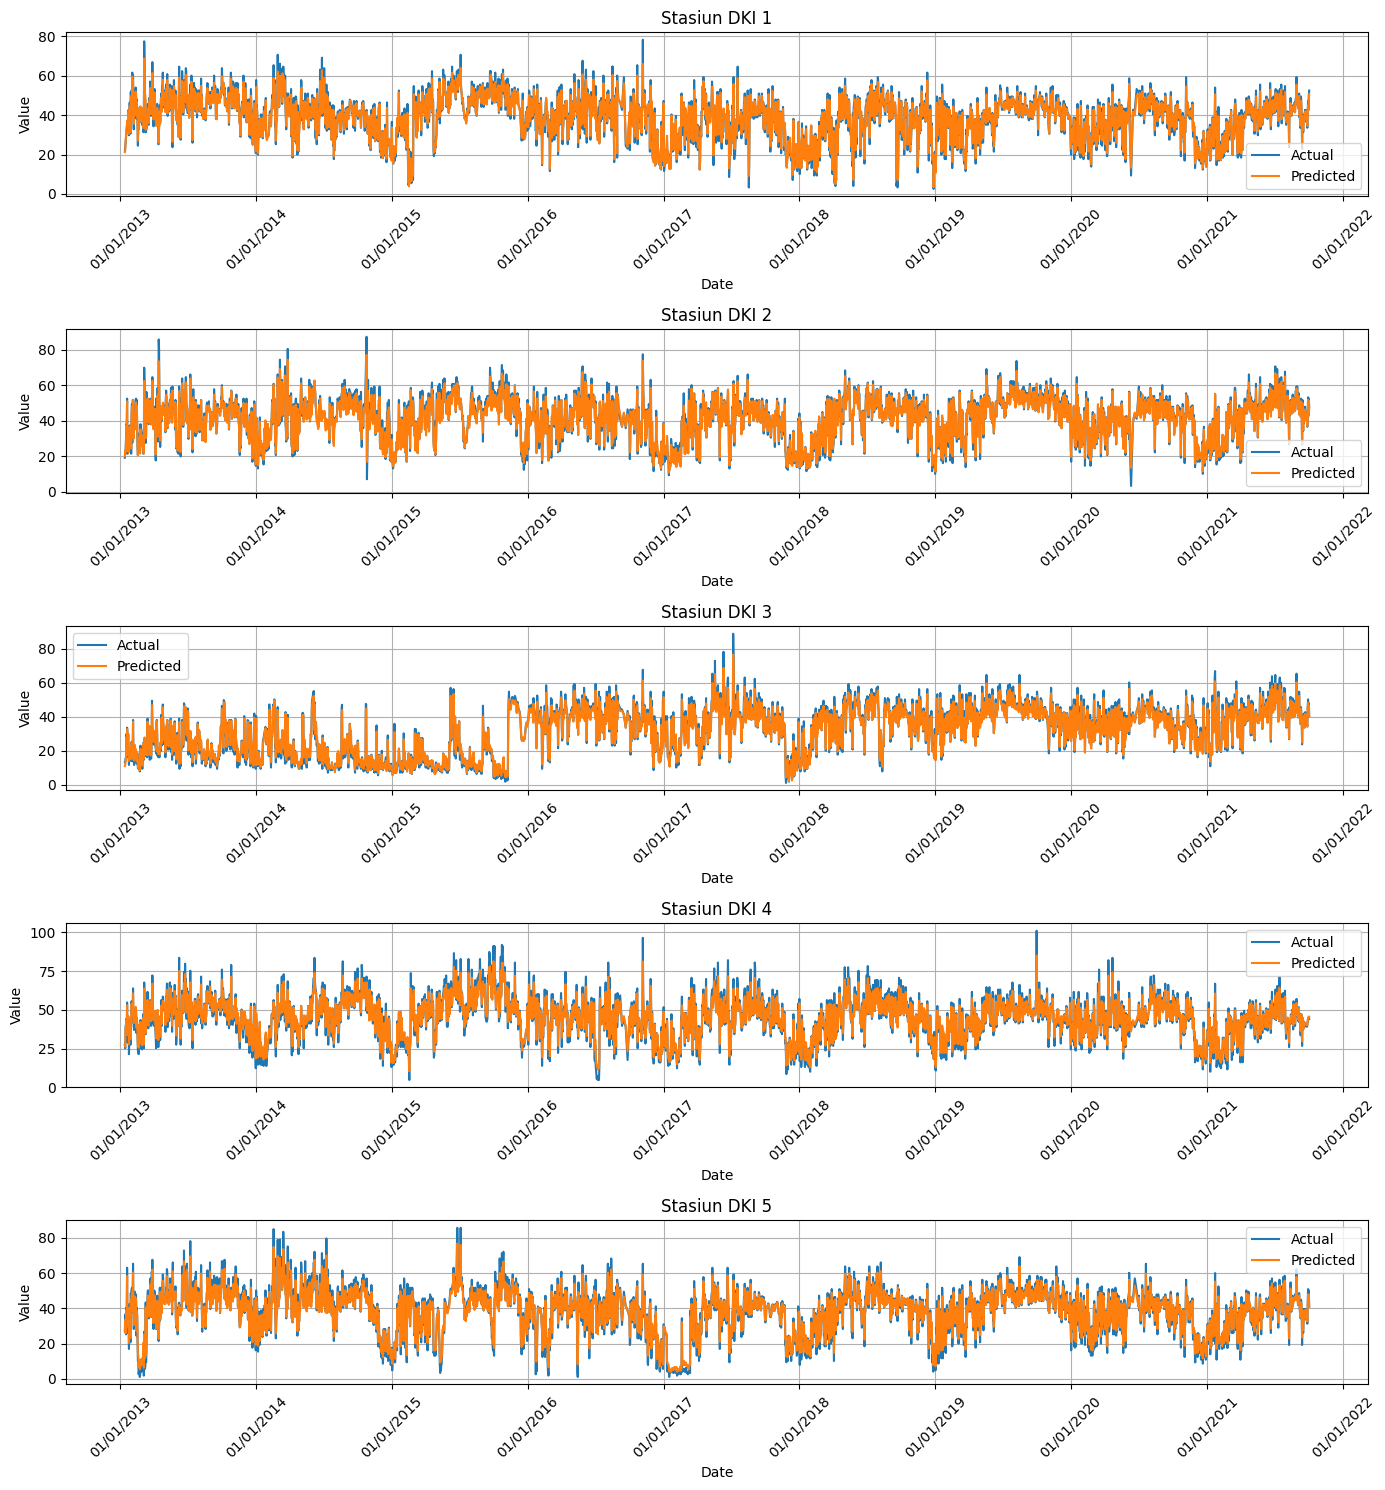

In [78]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

# Prediction using training data
predictions_pm10 = model_pm10.predict([X_normalized_pm10, y_normalized_pm10])

# Convert the scaled data into original scale
predictions_pm10_reshaped = predictions_pm10.reshape(-1, 5)  # mengubah bentuk data pred menjadi (None, 5)
predictions_pm10_actual = scaler.inverse_transform(predictions_pm10_reshaped).reshape(predictions_pm10.shape)  # Kembalikan ke bentuk asli

y_reshaped = y_normalized_pm10.reshape(-1, 5)  # mengubah data asli menjadi (None, 5)
y_actual_pm10 = scaler.inverse_transform(y_reshaped).reshape(y_normalized_pm10.shape)  # Kembalikan ke bentuk asli

# Date array 
time_labels_pm10 = []
for i in range(len(seq_array_pm10) - timesteps - future_steps + 1):
    if i < len(dates_array_pm10_new):
        dates = dates_array_pm10_new[i][0][0]  # ambil tanggal pertama dari setiap prediksi
    else:
        dates = dates_array_pm10_new[-1][0][0]  # ambil tanggal terakhir dari data terakhir
    time_labels_pm10.append(dates)

time_labels_pm10 = np.array(time_labels_pm10)[:len(predictions_pm10_actual)]
time_labels_pm10 = [datetime.strptime(date, '%d/%m/%Y') for date in time_labels_pm10]

predictions_pm10_actual = predictions_pm10_actual[:len(time_labels_pm10)]
y_actual_pm10 = y_actual_pm10[:len(time_labels_pm10)]

# Define the station names
station_names = ['Stasiun DKI 1', 'Stasiun DKI 2', 'Stasiun DKI 3', 'Stasiun DKI 4', 'Stasiun DKI 5']

# Plot time series for each station using the training data
plt.figure(figsize=(14, 15))
for station_index in range(5):
    plt.subplot(5, 1, station_index + 1)
    plt.plot(time_labels_pm10, y_actual_pm10[:, 0, station_index], label='Actual')
    plt.plot(time_labels_pm10, predictions_pm10_actual[:, 0, station_index], label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(station_names[station_index])
    plt.legend()
    plt.grid(True)
    # Set locator and formatter for the x-axis
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
    ax.xaxis.set_tick_params(rotation=45)  # Rotate the dates for better readability

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 43ms/step
Predictions DataFrame (pm10):
   Predicted_Stasiun DKI 1_pm10  Predicted_Stasiun DKI 2_pm10  \
0                     50.651787                     46.937733   
1                     44.157227                     45.533455   
2                     40.473938                     47.631775   
3                     44.515297                     48.385159   
4                     33.196434                     36.224819   

   Predicted_Stasiun DKI 3_pm10  Predicted_Stasiun DKI 4_pm10  \
0                     40.561310                     45.280552   
1                     38.708397                     42.985958   
2                     31.435459                     40.883617   
3                     35.361404                     49.231606   
4                     32.279751                     38.242924   

   Predicted_Stasiun DKI 5_pm10  
0                     40.806492  
1                     38.577095  
2                     37.490089  


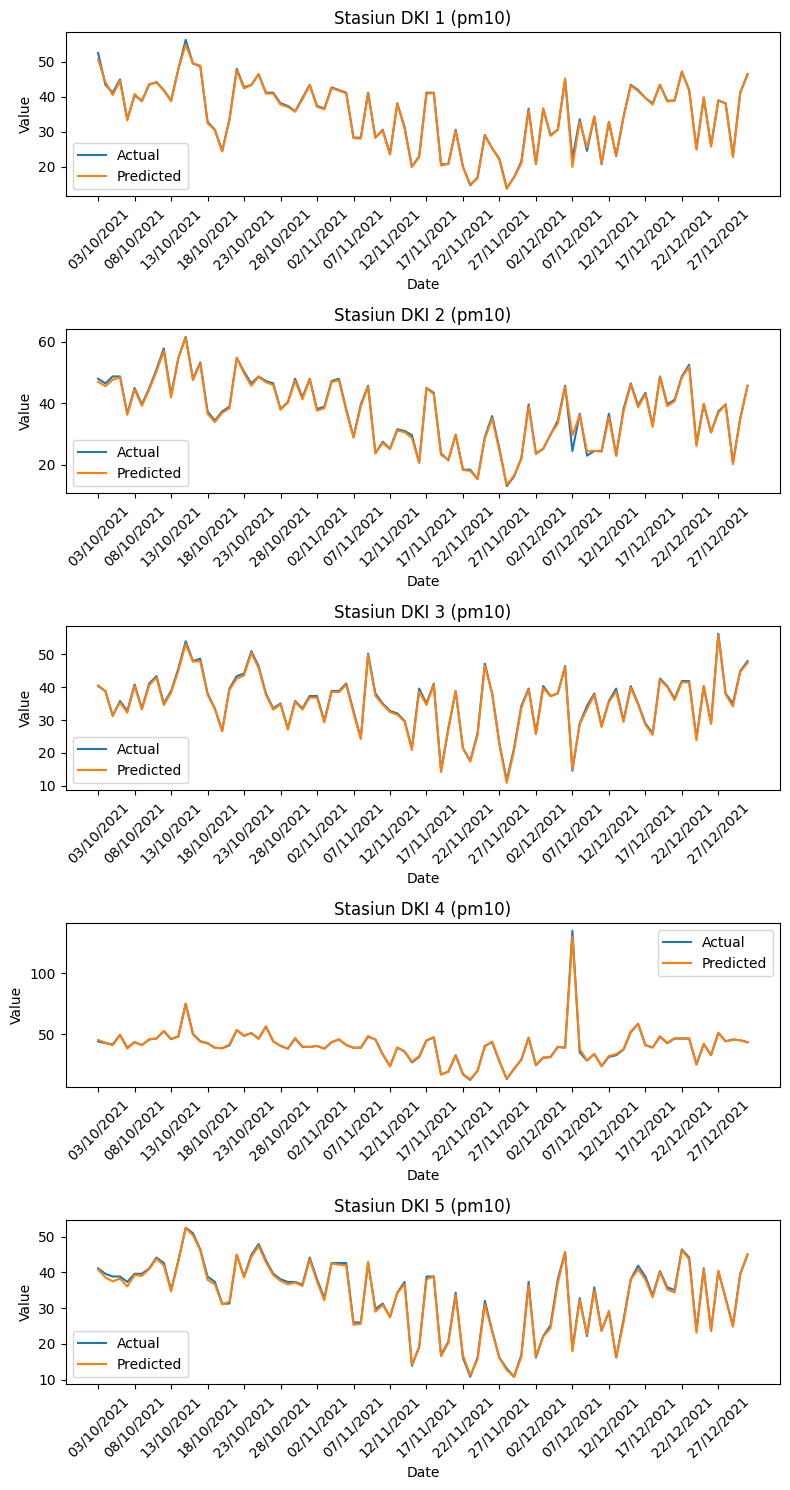

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prediction Using Testing Data
predictions_pm10_test = model_pm10.predict([X_test_normalized_pm10, y_test_normalized_pm10])

# Convert to the original scale
predictions_pm10_test_reshaped = predictions_pm10_test.reshape(-1, 5)  # Mengubah bentuk data prediksi menjadi (None, 5)
predictions_pm10_test_actual = scaler.inverse_transform(predictions_pm10_test_reshaped).reshape(predictions_pm10_test.shape)
y_test_reshaped = y_test_normalized_pm10.reshape(-1, 5)  # Mengubah data asli menjadi (None, 5)
y_test_actual_pm10 = scaler.inverse_transform(y_test_reshaped).reshape(y_test_normalized_pm10.shape)

# Save forecast into a new data frame
predictions_data_pm10 = []
for station_index in range(5):
    # Choose the first value for each timestep, except for the last output
    predicted_values = predictions_pm10_test_actual[:-1, 0, station_index]
    # Coose every component for the last timestep
    predicted_values_last = predictions_pm10_test_actual[-1, :, station_index]
    predicted_values = np.concatenate((predicted_values, predicted_values_last), axis=0)

    # Menyimpan data ke dalam format DataFrame
    station_data = pd.DataFrame({
        f'Predicted_{station_names[station_index]}_pm10': predicted_values
    })
    predictions_data_pm10.append(station_data)

# Combine all the dataframes
df_predictions_combined_pm10 = pd.concat(predictions_data_pm10, axis=1)

actual_data_pm10 = []
for station_index in range(5):
    # Ambil nilai pertama untuk setiap timestep kecuali output terakhir
    actual_values = y_test_actual_pm10[:-1, 0, station_index]
    # Ambil semua komponen dari timestep terakhir dan gabungkan dengan komponen pertama dari timesteps sebelumnya
    actual_values_last = y_test_actual_pm10[-1, :, station_index]
    actual_values = np.concatenate((actual_values, actual_values_last), axis=0)

    # Menyimpan data ke dalam format DataFrame
    station_data = pd.DataFrame({
        f'Actual_{station_names[station_index]}_pm10': actual_values
    })
    actual_data_pm10.append(station_data)

df_actuals_combined_pm10 = pd.concat(actual_data_pm10, axis=1)

print("Predictions DataFrame (pm10):")
print(df_predictions_combined_pm10.head())
print("\nActuals DataFrame (pm10):")
print(df_actuals_combined_pm10.head())

last_dates = dates_array_pm10_new[-1]

# Plot time series for each station using the test data
plt.figure(figsize=(8, 15))
for station_index in range(5):
    plt.subplot(5, 1, station_index + 1)
    plt.plot(df_actuals_combined_pm10[f'Actual_{station_names[station_index]}_pm10'][-90:], label='Actual')
    plt.plot(df_predictions_combined_pm10[f'Predicted_{station_names[station_index]}_pm10'][-90:], label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{station_names[station_index]} (pm10)')
    plt.legend()
    plt.grid(False)  # Disable grid
    plt.xticks(ticks=np.arange(0, 90, 5), labels=last_dates[::5, 0], rotation=45)  # Set x-axis ticks and labels

plt.tight_layout()
plt.show()

MAPE and RMSE for the evaluation

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung MAPE
def calculate_mape(y_true, y_pred):
    non_zero_indices = y_true != 0  # Mendapatkan indeks nilai yang bukan 0
    y_true_non_zero = y_true[non_zero_indices]
    y_pred_non_zero = y_pred[non_zero_indices]
    mape = np.mean(np.abs((y_true_non_zero - y_pred_non_zero) / y_true_non_zero)) * 100
    return mape

# Fungsi untuk menghitung RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true - y_pred)))

# Fungsi untuk menghitung MAE
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Menghitung MAPE, RMSE, dan MAE untuk setiap stasiun pada data pelatihan

# Menghitung MAPE dan RMSE untuk setiap stasiun pada data pelatihan
mapes_training_pm10 = []
rmses_training_pm10 = []
for station_index in range(5):
    predicted_values = predictions_pm10_actual[:, 0, station_index]
    actual_values = y_actual_pm10[:, 0, station_index]
    mape_training = calculate_mape(actual_values, predicted_values)
    rmse_training = calculate_rmse(actual_values, predicted_values)
    mapes_training_pm10.append(mape_training)
    rmses_training_pm10.append(rmse_training)
    print(f"Metrics for Station {station_index+1} on Training Data:")
    print(f"MAPE: {mape_training:.4f}%")
    print(f"RMSE: {rmse_training:.4f}")

# Menghitung rata-rata MAPE dan RMSE untuk semua stasiun pada data pelatihan
average_mape_training_pm10 = np.mean(mapes_training_pm10)
average_rmse_training_pm10 = np.mean(rmses_training_pm10)
print(f"\nAverage Metrics for All Stations on Training Data:")
print(f"Average MAPE: {average_mape_training_pm10:.4f}%")
print(f"Average RMSE: {average_rmse_training_pm10:.4f}")

# Menghitung MAPE dan RMSE untuk setiap stasiun pada data uji
mapes_testing_pm10 = []
rmses_testing_pm10 = []
for station_index in range(5):
    predicted_values = predictions_pm10_test_actual[:-1, 0, station_index]
    actual_values = y_test_actual_pm10[:-1, 0, station_index]
    predicted_values_last = predictions_pm10_test_actual[-1, :, station_index]
    actual_values_last = y_test_actual_pm10[-1, :, station_index]
    predicted_values = np.concatenate((predicted_values, predicted_values_last), axis=0)
    actual_values = np.concatenate((actual_values, actual_values_last), axis=0)
    mape_testing = calculate_mape(actual_values, predicted_values)
    rmse_testing = calculate_rmse(actual_values, predicted_values)
    mapes_testing_pm10.append(mape_testing)
    rmses_testing_pm10.append(rmse_testing)
    print(f"Metrics for Station {station_index+1} on Testing Data:")
    print(f"MAPE: {mape_testing:.4f}%")
    print(f"RMSE: {rmse_testing:.4f}")

# Menghitung rata-rata MAPE dan RMSE untuk semua stasiun pada data uji
average_mape_testing_pm10 = np.mean(mapes_testing_pm10)
average_rmse_testing_pm10 = np.mean(rmses_testing_pm10)
print(f"\nAverage Metrics for All Stations on Testing Data:")
print(f"Average MAPE: {average_mape_testing_pm10:.4f}%")
print(f"Average RMSE: {average_rmse_testing_pm10:.4f}")


Metrics for Station 1 on Training Data:
MAPE: 3.6824%
RMSE: 1.5739
Metrics for Station 2 on Training Data:
MAPE: 3.5686%
RMSE: 1.7135
Metrics for Station 3 on Training Data:
MAPE: 5.5765%
RMSE: 1.7081
Metrics for Station 4 on Training Data:
MAPE: 5.3375%
RMSE: 2.5945
Metrics for Station 5 on Training Data:
MAPE: 7.8059%
RMSE: 2.1714

Average Metrics for All Stations on Training Data:
Average MAPE: 5.1942%
Average RMSE: 1.9523
Metrics for Station 1 on Testing Data:
MAPE: 0.9146%
RMSE: 0.4498
Metrics for Station 2 on Testing Data:
MAPE: 1.4613%
RMSE: 0.7483
Metrics for Station 3 on Testing Data:
MAPE: 1.2686%
RMSE: 0.4679
Metrics for Station 4 on Testing Data:
MAPE: 0.9425%
RMSE: 0.6877
Metrics for Station 5 on Testing Data:
MAPE: 1.4977%
RMSE: 0.5480

Average Metrics for All Stations on Testing Data:
Average MAPE: 1.2169%
Average RMSE: 0.5803
